In [24]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from skimage.io import imread, imshow, imread_collection, concatenate_images
import cv2
from tqdm import tqdm
import copy
import logging
import os
from pathlib import Path
import const

ROOT_DIR = Path().resolve()
ROOT_DIR = ROOT_DIR / const.sample
HORIZONTAL_SPLIT = 2
VERTICAL_SPLIT = 2

In [4]:
def s(img, title=''):
    """
    Show image with title.
    :param img: input image
    :param img: title should be shown(default is empty)
    """
    plt.figure(figsize=(6,6))
    plt.title(title + str(img.shape))
    imshow(img)
    plt.show()

def inputPicture(pic_name):
    """
    Concatenate all colored pictures into one picture
    :param pic0~3: input images
    :return: integrated picture
    """
    path = ROOT_DIR / pic_name
    pic_color = cv2.imread(str(path), cv2.IMREAD_COLOR)
    pic_color = cv2.cvtColor(pic_color, cv2.COLOR_BGR2RGB)
    return pic_color


def coloring(pic, color_num):
    """
    Color binalized picture
    :param pic: input image
    :param color_num: choose which color is painted
    :return: colored picture
    """
    if color_num == 3:
        color = [255, 128, 0]
        color_num = 0
    else:
        color = [0, 0, 0]
    for i in range(pic.shape[0]):
        for j in range(pic.shape[1]):
            if pic[i, j, 0] > 0:
                color[color_num] = 255
                pic[i, j, :] = color
    return pic[:, :, :]

def concat(pic0, pic1, pic2, pic3):
    """
    Concatenate all colored pictures into one picture
    :param pic0~3: input images
    :return: integrated picture
    """
    mix = coloring(pic0, 0) + coloring(pic1, 1) + coloring(pic2, 2) + coloring(pic3, 3)
    mix = cv2.cvtColor(mix, cv2.COLOR_BGR2RGB)
    return mix

def colorToblack(color):
    """
    Change color picture to 3 dimensional black
    :param color: color image
    :return: 3dimensional black-white picture
    """
    for i_index, i in enumerate(color):
        for j_index, j in enumerate(i):
            if j.any() > 0:
                color[i_index, j_index, :] = [255, 255, 255]
    return ~color

def for_comparison_color(image):
    colorStrain4 = image.copy()
    for index_i, i in enumerate(colorStrain4):
        for index_j, j in enumerate(i):
            if sum(list(j)) != 765:
                colorStrain4[index_i, index_j, :] = [0, 0, 255]
    cv2.imwrite(str(ROOT_DIR / 'other' / 'default_color_compare.png'), colorStrain4)
    return colorStrain4

*input all files needed*

In [5]:
path = ROOT_DIR
# strain0% picture
im = ~inputPicture('default.tif')
# strain4% picture
strain4 = ~inputPicture('4per.tif')
# DIC strain pictures
pic0 = cv2.imread(str(path / 'strain' / '0-2%.png'), cv2.IMREAD_COLOR)
pic1 = cv2.imread(str(path / 'strain' / '2-4%.png'), cv2.IMREAD_COLOR)
pic2 = cv2.imread(str(path / 'strain' / '4-6%.png'), cv2.IMREAD_COLOR)
pic3 = cv2.imread(str(path / 'strain' / '6-8%.png'), cv2.IMREAD_COLOR)
# orientation picture
orien = inputPicture('orientation.tif')
# ferrite-bainite-colored picture
ferrite_bainite = inputPicture('ferrite-bainite2-color.png')

*Make colored strain picture*

In [6]:
#only for sample3 (to match the size of )
pic0 = pic0[:, 85:938, :]
pic1 = pic1[:, 85:938, :]
pic2 = pic2[:, 85:938, :]
pic3 = pic3[:, 85:938, :]

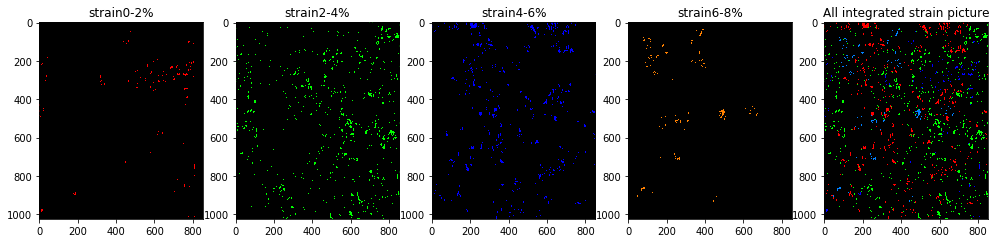

True

In [7]:
pic0 = cv2.cvtColor(pic0, cv2.COLOR_BGR2RGB)
pic1 = cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB)
pic2 = cv2.cvtColor(pic2, cv2.COLOR_BGR2RGB)
pic3 = cv2.cvtColor(pic3, cv2.COLOR_BGR2RGB)
strain = concat(pic0, pic1, pic2, pic3)
plt.figure(figsize=(17,19))
plt.subplot(151),plt.imshow(pic0),plt.title('strain0-2%')
plt.subplot(152),plt.imshow(pic1),plt.title('strain2-4%')
plt.subplot(153),plt.imshow(pic2),plt.title('strain4-6%')
plt.subplot(154),plt.imshow(pic3),plt.title('strain6-8%')
plt.subplot(155),plt.imshow(strain),plt.title('All integrated strain picture')
plt.show()
cv2.imwrite(str(path / 'strain' / 'strain_concat.png'), strain)
strain = cv2.cvtColor(strain, cv2.COLOR_RGB2BGR)

*show all input pictures*

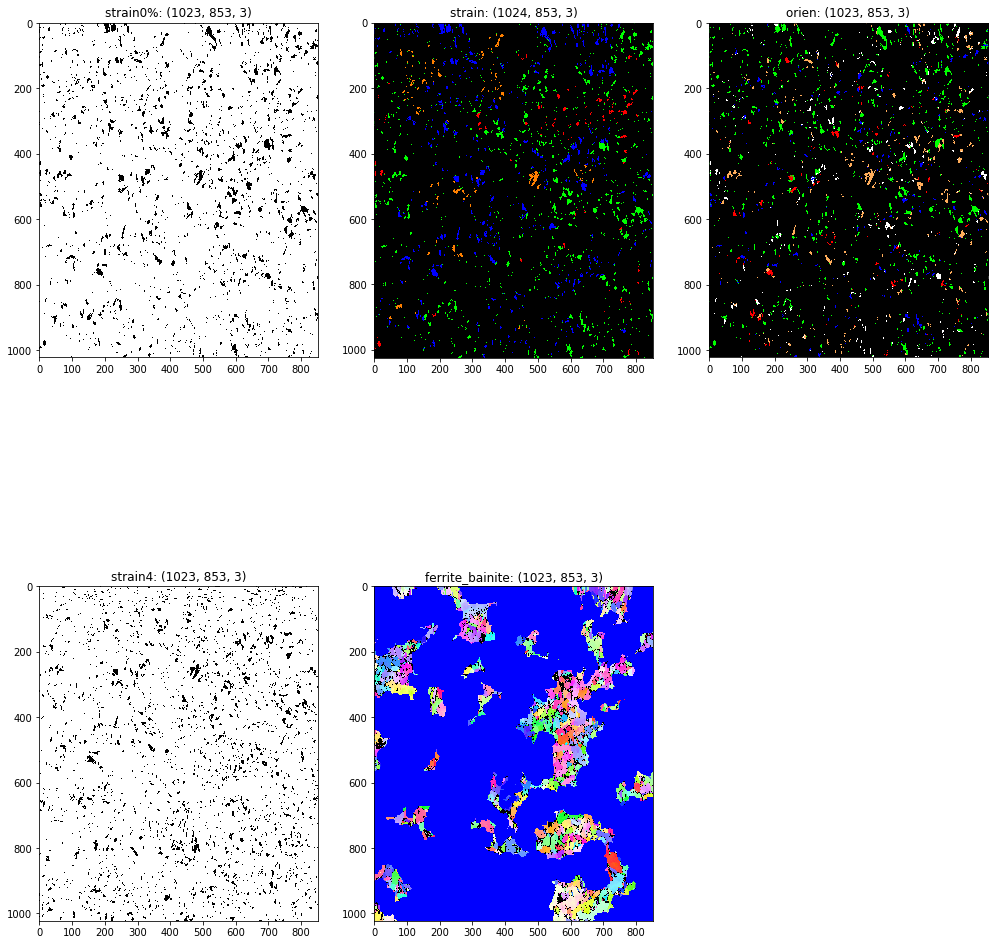

In [30]:
plt.figure(figsize=(17,19))
plt.subplot(231),plt.imshow(im),plt.title('strain0%: ' + str(im.shape))
plt.subplot(232),plt.imshow(strain),plt.title('strain: ' + str(strain.shape))
plt.subplot(233),plt.imshow(orien),plt.title('orien: ' + str(orien.shape))
plt.subplot(234),plt.imshow(strain4),plt.title('strain4: ' + str(strain4.shape))
plt.subplot(235),plt.imshow(ferrite_bainite),plt.title('ferrite_bainite: ' + str(ferrite_bainite.shape))
plt.show()

*trim and make all to be the same size*<br>
*im.shape = orien.shape = ferrite_bainite.shape, so just refer only im trimming range*

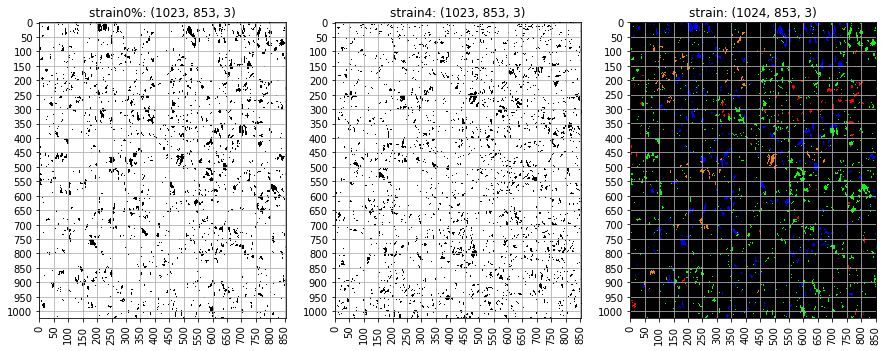

In [31]:
plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(im),plt.title('strain0%: ' + str(im.shape)) \
,plt.xticks(np.arange(0, im.shape[1], step=50), rotation='vertical') \
,plt.yticks(np.arange(0, im.shape[0], step=50)),plt.grid()
plt.subplot(132),plt.imshow(strain4),plt.title('strain4: ' + str(strain4.shape)) \
,plt.xticks(np.arange(0, strain4.shape[1], step=50), rotation='vertical') \
,plt.yticks(np.arange(0, strain4.shape[0], step=50)),plt.grid()
plt.subplot(133),plt.imshow(strain),plt.title('strain: ' + str(strain.shape)) \
,plt.xticks(np.arange(0, strain.shape[1], step=50), rotation='vertical') \
,plt.yticks(np.arange(0, strain.shape[0], step=50)),plt.grid()
plt.show()

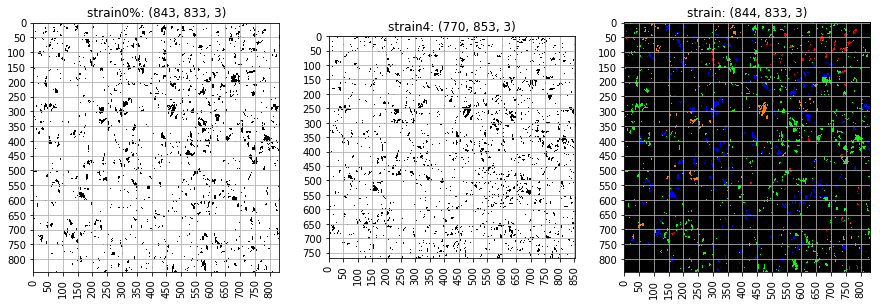

In [32]:
im_adjust = im[180:, 20:, :]
orien_adjust = orien[180:, 20:, :]
strain_adjust = strain[180:, 20:, :]
strain4_adjust = strain4[:770, :, :]
ferrite_bainite_adjust = ferrite_bainite[180:, 20:, :]

plt.figure(figsize=(15,15))
plt.subplot(131),plt.imshow(im_adjust),plt.title('strain0%: ' + str(im_adjust.shape)) \
,plt.xticks(np.arange(0, im_adjust.shape[1], step=50), rotation='vertical') \
,plt.yticks(np.arange(0, im_adjust.shape[0], step=50)),plt.grid()
plt.subplot(132),plt.imshow(strain4_adjust),plt.title('strain4: ' + str(strain4_adjust.shape)) \
,plt.xticks(np.arange(0, strain4_adjust.shape[1], step=50), rotation='vertical') \
,plt.yticks(np.arange(0, strain4_adjust.shape[0], step=50)),plt.grid()
plt.subplot(133),plt.imshow(strain_adjust),plt.title('strain: ' + str(strain_adjust.shape)) \
,plt.xticks(np.arange(0, strain_adjust.shape[1], step=50), rotation='vertical') \
,plt.yticks(np.arange(0, strain_adjust.shape[0], step=50)),plt.grid()
plt.show()

In [33]:
im_adjust = cv2.resize(im_adjust, (im_adjust.shape[1], im_adjust.shape[0]))
orien_adjust = cv2.resize(orien_adjust, (im_adjust.shape[1], im_adjust.shape[0]))
strain_adjust = cv2.resize(strain_adjust, (im_adjust.shape[1], im_adjust.shape[0]))
strain4_adjust = cv2.resize(strain4_adjust, (im_adjust.shape[1], im_adjust.shape[0]))
ferrite_bainite_adjust = cv2.resize(ferrite_bainite_adjust, (im_adjust.shape[1], im_adjust.shape[0]))

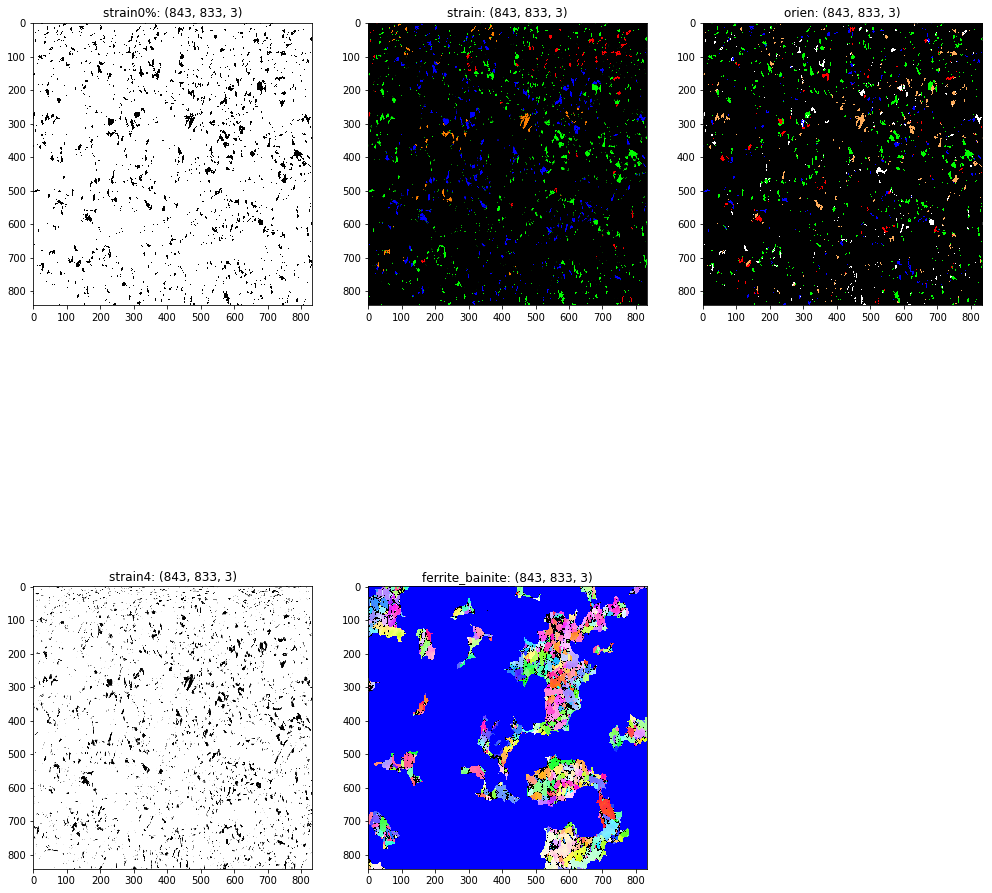

In [34]:
plt.figure(figsize=(17,19))
plt.subplot(231),plt.imshow(im_adjust),plt.title('strain0%: ' + str(im_adjust.shape))
plt.subplot(232),plt.imshow(strain_adjust),plt.title('strain: ' + str(strain_adjust.shape))
plt.subplot(233),plt.imshow(orien_adjust),plt.title('orien: ' + str(orien_adjust.shape))
plt.subplot(234),plt.imshow(strain4_adjust),plt.title('strain4: ' + str(strain4_adjust.shape))
plt.subplot(235),plt.imshow(ferrite_bainite_adjust),plt.title('ferrite_bainite: ' + str(ferrite_bainite_adjust.shape))
plt.show()

*for distortion correction*

In [35]:
orien_adjust = cv2.cvtColor(orien_adjust, cv2.COLOR_RGB2BGR)
strain_adjust = cv2.cvtColor(strain_adjust, cv2.COLOR_RGB2BGR)
ferrite_bainite_adjust = cv2.cvtColor(ferrite_bainite_adjust, cv2.COLOR_RGB2BGR)
cv2.imwrite(str(ROOT_DIR / 'for_pin' / 'im_trim.png'), im_adjust)
cv2.imwrite(str(ROOT_DIR / 'for_pin' / 'orien_trim.png'), orien_adjust)
cv2.imwrite(str(ROOT_DIR / 'for_pin' / 'strain_trim.png'), strain_adjust)
cv2.imwrite(str(ROOT_DIR / 'for_pin' / 'strain4_trim.png'), strain4_adjust)
cv2.imwrite(str(ROOT_DIR / 'for_pin' / 'ferrite_bainite_trim.png'), ferrite_bainite_adjust)

True

*output comparison pic


In [36]:
path = ROOT_DIR / 'for_pin' / 'strain4_trim.png'
pic_color = cv2.imread(str(path), cv2.IMREAD_COLOR)
pic_color = cv2.cvtColor(pic_color, cv2.COLOR_BGR2RGB)
for_comparison_color(pic_color)

path = ROOT_DIR / 'for_pin' / 'im_trim.png'
pic_color = cv2.imread(str(path), cv2.IMREAD_COLOR)
pic_color = cv2.cvtColor(pic_color, cv2.COLOR_BGR2RGB)
cv2.imwrite(str(ROOT_DIR / 'other' / 'default_black.png'), pic_color)

True